In [1]:
from scipy import stats
import numpy as np
import pandas as pd
from IPython.display import Image
rng = np.random.default_rng()

In [15]:
stats.ttest_1samp??

## basics

- null hypothesis （0假设），Alternative Hypothesis（备择假设）
    - 一般 0 假设表示没有（显著性）差异，比如均值之间；
- significance level（$\alpha=0.05$），
    - 恰巧发生的概率，所谓的小概率事件；
- p-value：
    - p-value < 0.05，作为显著性差异的阈值
        - null hypothesis：0假设，没有显著性差异
        - p-value < 0.05：拒绝0假设，存在显著性差异；
        - p-value > 0.05: 不能拒绝0假设；
- 均值检验，方差检验；
- 单样本，双样本；样本是否独立；

## scipy.stats

- `stats.ttest_rel` & `stats.wilcoxon`
    - 都会得到统计量与 pvalue
- T 检验
    - `stats.ttest_1samp`
        - Calculate the T-test for the mean of ONE group of scores.
        - This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations `a` is equal to the given population mean, `popmean`.
    - `stats.ttest_ind`
        - Calculate the T-test for the means of **two independent** samples of scores.
            - 是否独立性假设；
        - This is a test for the null hypothesis that 2 independent samples have **identical average** (expected) values. This test assumes that the populations have identical variances by default.
    - `stats.ttest_rel`：非独立
- `stats.f_oneway`
    - perform one-way ANOVA.
    - The one-way ANOVA tests the null hypothesis that **two or more groups** have the same population mean.  The test is applied to samples from two or more groups, possibly with differing sizes.
- `stats.chi2_contingency`
    - Chi-square test of independence of variables in a contingency table.
    - This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::

$$
        \text{dof = observed.size - sum(observed.shape) + observed.ndim - 1}
$$

## 实例

### t-test 单样本

In [2]:
ages = np.asarray([32., 34., 29., 29., 22., 39., 38., 37., 38., 36., 30., 26., 22., 22])
np.mean(ages)

31.0

In [3]:
stats.ttest_1samp(ages, 30)

TtestResult(statistic=0.5973799001456603, pvalue=0.5605155888171379, df=13)

In [20]:
t_stats, p_value = stats.ttest_1samp(ages, 30)
p_value

0.5605155888171379

- p_value > 0.05
    - 没有显著性差异，不能拒绝均值==30

In [4]:
t_stats, p_value = stats.ttest_1samp(ages, 35)
p_value

0.03272038491333482

### t-test 双样本

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [46]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)

In [42]:
np.mean(rvs1), np.mean(rvs2), np.mean(rvs3)

(4.1900175459746904, 4.642824997591706, 6.430691679595462)

In [43]:
np.std(rvs1), np.std(rvs2), np.std(rvs3)

(9.700925409574204, 10.078809175055934, 19.948202195476405)

In [47]:
print(stats.ttest_ind(rvs1, rvs2))
print(stats.ttest_ind(rvs1, rvs2, equal_var=False))

TtestResult(statistic=-0.49537433870606046, pvalue=0.6204449578289647, df=998.0)
TtestResult(statistic=-0.49537433870606046, pvalue=0.6204451664416375, df=996.0942229677984)


In [48]:
# ttest_ind underestimates p for unequal variances:
print(stats.ttest_ind(rvs1, rvs3))
print(stats.ttest_ind(rvs1, rvs3, equal_var=False))

TtestResult(statistic=0.30373296425349544, pvalue=0.761394652092535, df=998.0)
TtestResult(statistic=0.30373296425349544, pvalue=0.7614183534068387, df=726.1153549445374)


In [51]:
# When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:
print(stats.ttest_ind(rvs1, rvs4))
print(stats.ttest_ind(rvs1, rvs4, equal_var=False))

TtestResult(statistic=-1.4933370948718983, pvalue=0.1358763810169431, df=598.0)
TtestResult(statistic=-0.9340720514211528, pvalue=0.3523621135743835, df=107.39680565778839)


### ttest_rel

In [19]:
df = pd.read_csv("./data/blood_pressure.csv")

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [56]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [57]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

TtestResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823, df=119)

In [61]:
print(df[['bp_before', 'bp_after']].mean())
print(df[['bp_before', 'bp_after']].std())

bp_before    156.450000
bp_after     151.358333
dtype: float64
bp_before    11.389845
bp_after     14.177622
dtype: float64


### z-test

- Your sample size is greater than 30. Otherwise, use a t test.
- Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
- Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
- Your data should be randomly selected from a population, where each item has an equal chance of being selected.
- Sample sizes should be equal if at all possible.

In [16]:
from statsmodels.stats import weightstats as stests

In [71]:
stests.ztest(df['bp_before'], x2=None, value=156)

(0.432798073526164, 0.6651614730255063)

In [20]:
# stests.ztest(df['bp_before'], x2=df['bp_after'], value=0, alternative='two-sided')
stests.ztest(df['bp_before'], x2=df['bp_after'], value=0, 
#              alternative='two-sided'
            )

(3.0669836819036274, 0.002162306611369422)

### ANOVA (F-TEST) 

- t-test: dealing with two groups, sometimes we want to compare more than two groups at the same time
- ANOVA: Analysis of Variance
    - 其检测的依然是均值，而不是方差，Variance 只是其计算的中间步骤；
- F = Between group variability / Within group variability
- Unlike the z and t-distributions, the F-distribution does not have any negative values because between and within-group variability are always positive due to squaring each deviation

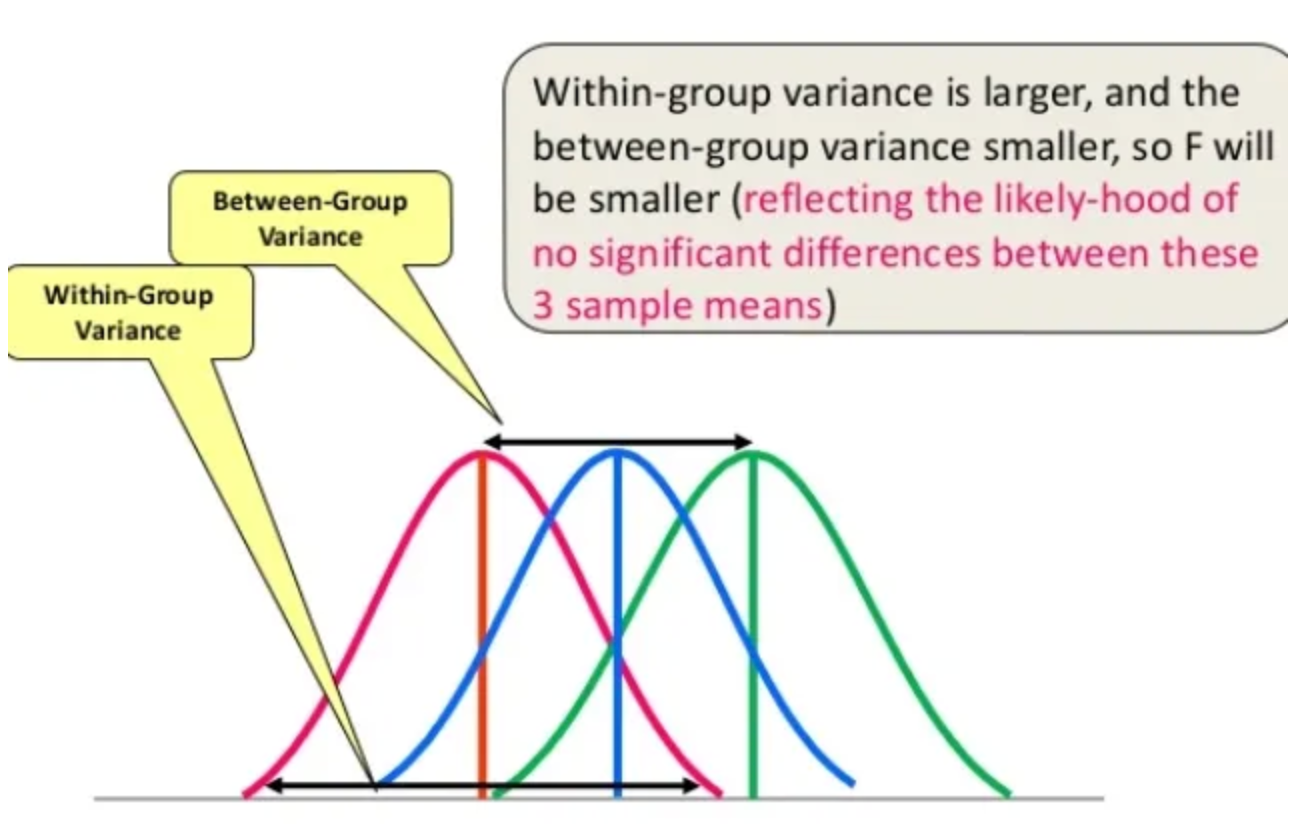

In [80]:
Image('../../../imgs/anova.png', width=400)

In [21]:
df_anova = pd.read_csv('./data/PlantGrowth.csv')
df_anova = df_anova[['weight', 'group']]
grps = pd.unique(df_anova.group.values)

In [25]:
df_anova.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [89]:
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

### Two Way F-test

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_anova2 = pd.read_csv("./data/crop_yield.csv")
df_anova2.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [7]:
df_anova2[['Fert', 'Water']].drop_duplicates()

,Fert,Water
0,A,High
5,B,High
10,A,Low
15,B,Low


In [10]:
# linear model
# Yield: 因变量
# C(.): Categorical
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4.112
Date:                Sat, 25 Nov 2023   Prob (F-statistic):             0.0243
Time:                        12:39:28   Log-Likelihood:                -50.996
No. Observations:                  20   AIC:                             110.0
Df Residuals:                      16   BIC:                             114.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       31.8000      1.549     20.527      0.000      28.516      35.084
C(Fert)[T.B]                    -1.9600      2.191     -0.895      0.384      -6.604       2.684
C(Water)[T.Low]                 -1.8000      2.191     -0.822      0.423      -6.444       2.844
C(Fert)[T.B]:C(Water)[T.Low]    -3.5200      3.098     -1.136      0.273     -10.088       3.048
==============================================================================
Omnibus:                        3.427   Durbin-Watson:                   2.963
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.319
Skew:                          -0.082   Prob(JB):                        0.517
Kurtosis:                       1.752   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print(f"Overall model F({model.df_model: .0f}, {model.df_resid: .0f}) \
      = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3,  16)       =  4.112, p =  0.0243


In [12]:
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


### Chi-Square Test

- The test is applied when you have two categorical variables from a single population.
    - It is used to determine whether there is a significant association between the two variables.
    
$$
\chi^2=\sum\frac{(O-E)^2}{E}
$$

|                | Aspirin | Control/Placebo |
|----------------|---------|-----------------|
| Ischemic stroke| 176     | 230             |
| No stroke      | 21035   | 21018           |

用来展示一项临床试验或研究的结果，其中比较了接受阿司匹林治疗与对照组（可能是安慰剂治疗或无治疗）在发生缺血性中风方面的差异。具体数值表明了每组中发生和未发生中风的案例数。

In [2]:
table = np.array([[176, 230], 
                  [21035, 21018]])
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=6.892569132546561, pvalue=0.008655478161175739, dof=1, expected_freq=array([[  202.82309993,   203.17690007],
       [21008.17690007, 21044.82309993]]))

In [4]:
# 完全对 table 是否转置不敏感
table = np.array([[176, 230], 
                  [21035, 21018]])
stats.chi2_contingency(table.T)

Chi2ContingencyResult(statistic=6.892569132546561, pvalue=0.008655478161175739, dof=1, expected_freq=array([[  202.82309993, 21008.17690007],
       [  203.17690007, 21044.82309993]]))

In [19]:
df_chi = pd.read_csv('./data/chi-test.csv')
contingency_table = pd.crosstab(df_chi["Gender"],df_chi["Like Shopping?"])
contingency_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [27]:
# Observed Values
Observed_Values = contingency_table.values

In [30]:
stats.chi2_contingency??

In [22]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[2.22222222, 2.77777778],
       [1.77777778, 2.22222222]]))

In [28]:
# Expected_Values
Expected_Values = stats.chi2_contingency(contingency_table)[3]

In [26]:
# dof == (2-1)*(2-1)
contingency_table.shape

(2, 2)

In [35]:
Observed_Values = contingency_table.values
chi2_statistic, p, dof, Expected_Values = stats.chi2_contingency(contingency_table)
chi_square = sum([(o-e)**2./e for o, e in zip(Observed_Values, Expected_Values)])
chi_square_statistic = sum(chi_square)
chi_square_statistic

0.09000000000000008

In [37]:
diff = Expected_Values - Observed_Values
direction = np.sign(diff)
magnitude = np.minimum(0.5, np.abs(diff))
observed = Observed_Values + magnitude * direction
observed

array([[2.22222222, 2.77777778],
       [1.77777778, 2.22222222]])

In [41]:
Expected_Values

array([[2.22222222, 2.77777778],
       [1.77777778, 2.22222222]])